## 1. Load data

In [1]:
import numpy as np

# Load npz
data = np.load("../data/cancer_data.npz")

X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

print(f"Training X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Testing X shape: {X_test.shape}, y shape: {y_test.shape}")

Training X shape: (64, 4), y shape: (64,)
Testing X shape: (136, 4), y shape: (136,)


## 2. Load Trainable Quantum Feature Map

In [2]:
#!/usr/bin/env python3
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))

In [3]:
import pickle

with open(f"../data/tqfm_depth1.pkl", "rb") as f:
	tqfm = pickle.load(f)


## 3. Load Kernel

In [4]:
kernel = np.load("../data/kernel_matrix_after.npy")

## 3. Quantum Support Vector Machine

In [5]:
# update last change
import importlib
import src.qsvm
importlib.reload(src.qsvm)

<module 'src.qsvm' from 'd:\\QuantumComputing\\SVQSVM\\src\\qsvm.py'>

In [16]:
from src.qsvm import QSVC

qsvc = QSVC(C=1.0, gamma=1.0, type_ansatz="EfficientSU2", optimizer='COBYLA', max_iter=100)
qsvc.fit(X=X_train,
	y=y_train,
	kernel_matrix=kernel,
	theta_optimal=tqfm.optimal_params,
	parametrized_circuit=tqfm.circuit)

accuracy = qsvc.score(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


Using random initialization with 4 parameters
Test accuracy: 69.85%
Test accuracy: 69.85%


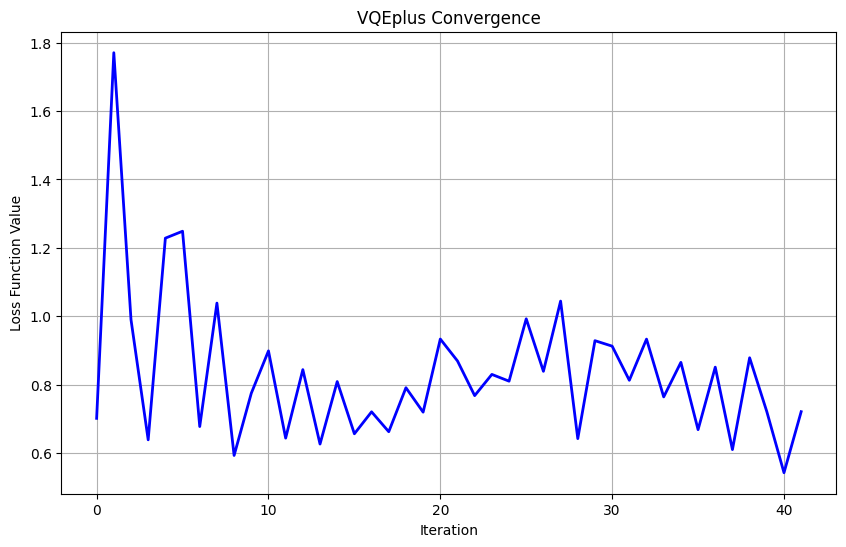

In [15]:
qsvc.plot_convergence()

## 4. Test accuracy with classical SVM

In [17]:
from src.kernel_estimate import KernelMatrix

kernel_test = np.load("../data/kernel_matrix_test.npy")

In [ ]:
from sklearn.svm import SVC

C = [0.1, 1.0, 10.0, 100.0]
gamma = [0.1, 1.0, 10.0, 100.0]

for c in C:
	for g in gamma:
		# Classical SVC with RBF kernel
		svc = SVC(kernel='rbf', C=c, gamma=g)
		svc.fit(X_train, y_train)
		accuracy_svc = svc.score(X_test, y_test)
		print(f"Classical SVC Test accuracy with C={c}, gamma={g}: {accuracy_svc * 100:.2f}%")


Classical SVC Test accuracy with C=0.1, gamma=0.1: 93.38%
Classical SVC Test accuracy with C=0.1, gamma=1.0: 96.32%
Classical SVC Test accuracy with C=0.1, gamma=10.0: 78.68%
Classical SVC Test accuracy with C=0.1, gamma=100.0: 65.44%
Classical SVC Test accuracy with C=1.0, gamma=0.1: 97.79%
Classical SVC Test accuracy with C=1.0, gamma=1.0: 96.32%
Classical SVC Test accuracy with C=1.0, gamma=10.0: 91.18%
Classical SVC Test accuracy with C=1.0, gamma=100.0: 73.53%
Classical SVC Test accuracy with C=10.0, gamma=0.1: 97.06%
Classical SVC Test accuracy with C=10.0, gamma=1.0: 97.79%
Classical SVC Test accuracy with C=10.0, gamma=10.0: 93.38%
Classical SVC Test accuracy with C=10.0, gamma=100.0: 75.74%
Classical SVC Test accuracy with C=100.0, gamma=0.1: 95.59%
Classical SVC Test accuracy with C=100.0, gamma=1.0: 99.26%
Classical SVC Test accuracy with C=100.0, gamma=10.0: 93.38%
Classical SVC Test accuracy with C=100.0, gamma=100.0: 75.74%
